Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


Importing Dataset

In [2]:
df = pd.read_csv("Dataset_Clean.csv")

In [3]:
df.reset_index(drop = True, inplace = True)

In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [18]:
df.describe(percentiles=[]).T

count         mean          std         min  \
UDI                      10000.0  5000.500000  2886.895680     1.00000   
Air temperature [K]      10000.0   300.004930     2.000259   295.30000   
Process temperature [K]  10000.0   310.005560     1.483734   305.70000   
Rotational speed [rpm]   10000.0  1538.776100   179.284096  1168.00000   
Torque [Nm]              10000.0    39.986910     9.968934     3.80000   
Tool wear [min]          10000.0   107.951000    63.654147     0.00000   
TWF                      10000.0     0.004600     0.067671     0.00000   
Temp_Delta               10000.0    10.000630     1.001094     7.60000   
Power                    10000.0  6279.744953  1067.418295  1148.44061   
Planned_Stop             10000.0     0.006400     0.079748     0.00000   
Time/Part                10000.0     2.600600     0.917477     2.00000   
Failures                 10000.0     0.029300     0.168655     0.00000   

                                 50%           max  
UDI                      5000.500000  10000.000000  
Air temperature [K]       300.100000    304.500000  
Process temperature [K]   310.100000    313.800000  
Rotational speed [rpm]   1503.000000   2886.000000  
Torque [Nm]                40.100000     76.600000  
Tool wear [min]           108.000000    253.000000  
TWF                         0.000000      1.000000  
Temp_Delta                  9.800000     12.100000  
Power                    6271.027344  10469.923005  
Planned_Stop                0.000000      1.000000  
Time/Part                   2.000000      5.000000  
Failures                    0.000000      1.000000

In [6]:
num_data = ['UDI','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Temp_Delta', 'Power']
categorical = ['Type', 'Time/Part', 'Planned_Stop']

target1 = ['Failures']
target2 = ['TWF']

In [7]:
total = df['Time/Part'].sum()
stop = df['Failures'].sum() + df['TWF'].sum()
total_parts = df['UDI'].count()

print(f"Machine works in total: {total-(stop*30):.2f} min, {(total-(stop*30))/60:.2f} hours ")
print(f"Machine failures: {stop} times")
print(f'Rate: {stop/total*60:.2f} stops/ hour')
print(f"Total Approved Produced: {total_parts-stop}, Total part scraped:{stop} parts, Percentage scraped:{stop/total_parts*100}%, Total waste time:{((stop*30)/22)/456:.2f} hours/day")


Machine works in total: 15836.00 min, 263.93 hours 
Machine failures: 339 times
Rate: 0.78 stops/ hour
Total Approved Produced: 9661, Total part scraped:339 parts, Percentage scraped:3.39%, Total waste time:1.01 hours/day


In [19]:
df['Total_parts'] = df.apply(lambda x: 0 if x['Failures']==1 or x['TWF']==1 else 1, axis=1)
df['Total_parts'].sum()

9661

In [9]:
product = 0
batch = []

for total_parts, planned_stop in zip(df['Total_parts'], df['Planned_Stop']):
    if total_parts == 1 or planned_stop == 1:
        product += 1
    elif product > 0:
        batch.append(product)
        product = 0

# Check if there's an unfinished batch
if product > 0:
    batch.append(product)

print(f'Batches: {batch}')
print(f'Total batches: {len(batch)}')
print(f'Total products: {sum(batch)}')

Batches: [50, 18, 7, 82, 6, 25, 12, 34, 5, 9, 67, 52, 61, 20, 122, 16, 142, 100, 32, 22, 22, 89, 68, 1, 7, 27, 19, 16, 4, 116, 39, 9, 55, 27, 17, 54, 3, 12, 73, 11, 86, 80, 20, 4, 18, 24, 162, 18, 59, 49, 40, 66, 10, 54, 31, 93, 17, 49, 7, 78, 16, 72, 77, 11, 96, 5, 14, 61, 58, 18, 120, 95, 29, 83, 5, 12, 87, 70, 49, 31, 72, 10, 64, 26, 5, 12, 7, 14, 24, 10, 1, 60, 6, 7, 58, 21, 7, 1, 9, 3, 22, 6, 1, 5, 8, 20, 1, 8, 7, 1, 10, 1, 1, 1, 6, 5, 2, 5, 2, 1, 21, 3, 13, 21, 1, 1, 1, 3, 11, 8, 2, 1, 6, 3, 10, 15, 2, 1, 13, 10, 1, 5, 8, 12, 1, 3, 1, 8, 4, 2, 7, 1, 1, 5, 7, 5, 6, 12, 6, 5, 4, 14, 5, 8, 16, 5, 2, 7, 11, 1, 6, 4, 8, 16, 3, 9, 6, 1, 10, 9, 2, 4, 9, 3, 3, 14, 17, 15, 1, 2, 3, 1, 1, 5, 1, 8, 6, 3, 1, 5, 1, 7, 35, 1, 14, 1, 2, 3, 3, 6, 68, 15, 39, 7, 3, 8, 50, 12, 79, 77, 89, 24, 59, 4, 86, 1, 45, 78, 1, 88, 27, 174, 31, 57, 24, 53, 74, 5, 12, 5, 69, 6, 83, 78, 58, 18, 27, 14, 77, 54, 4, 80, 39, 124, 7, 57, 20, 71, 3, 79, 112, 145, 82, 25, 27, 4, 21, 1, 75, 17, 68, 2, 3, 85, 34, 41, 7

In [40]:
import numpy as np
tool_wear = []
for i, value in enumerate(df['Planned_Stop']):
    if df['Planned_Stop'][i]==1:
        tool_wear.append(df['Tool wear [min]'][i])
        
tool_wear_mean = np.mean(tool_wear)
print(tool_wear_mean)

break_ant =[]
for i in range(len(tool_wear)):
    if tool_wear[i] < 215:
        break_ant.append(tool_wear[i])
print(len(break_ant))
        
      

215.296875
30


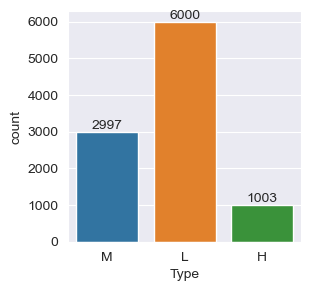

In [10]:
plt.figure(figsize=(3,3))
f = sns.countplot(data = df, x = df['Type'])
f.bar_label(f.containers[0])
plt.show()

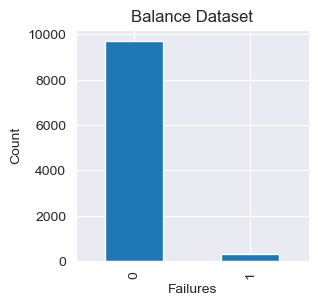

In [11]:
plt.figure(figsize=(3,3))
for i,feature in enumerate(target1):
    plt.subplot(1,len(target1), i+1)
    df[feature].value_counts().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('Balance Dataset')

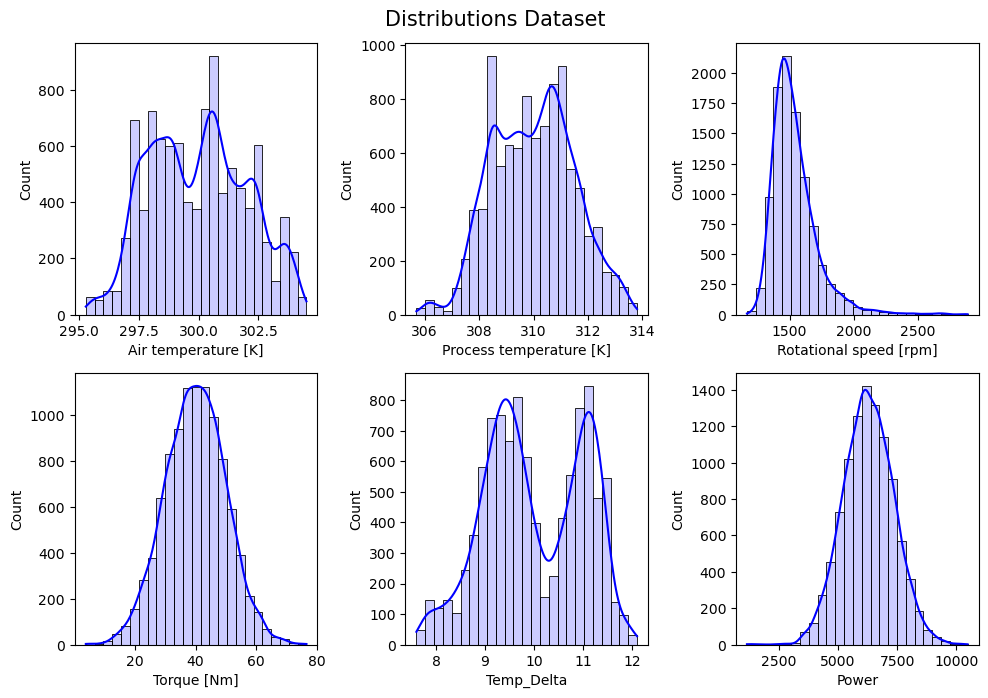

In [10]:
dist = df[num_data].drop(columns=['UDI','Tool wear [min]'])
plt.figure(figsize = (10, 10))
for i, col in enumerate(dist):
    plt.subplot(3,3, i+1)
    sns.histplot(df, x = col, kde = True, alpha = 0.2, color = 'blue', bins = 25)
plt.suptitle("Distributions Dataset", fontsize = 15)
plt.tight_layout()
plt.show()

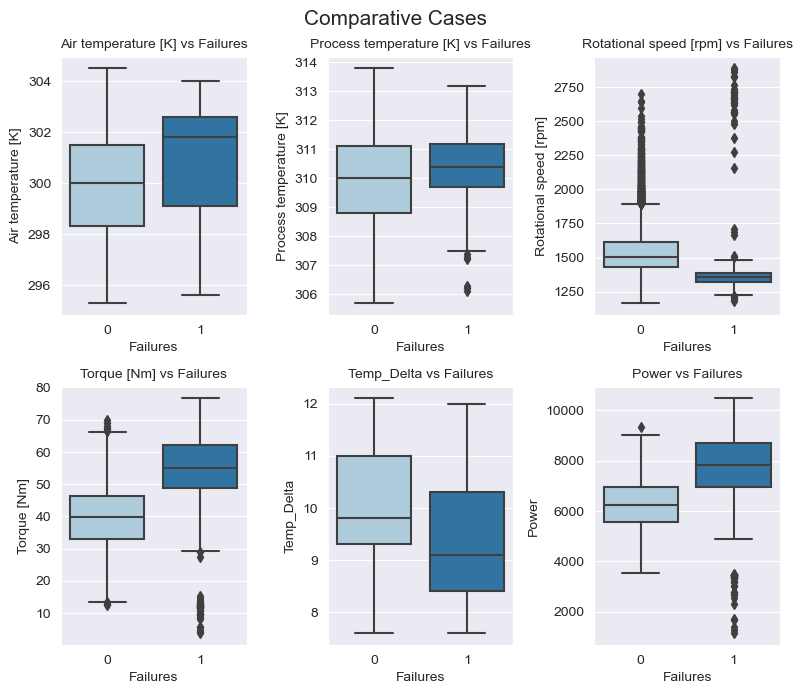

In [13]:
plt.figure(figsize=(8, 10))
for i, col in enumerate(dist):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x='Failures', y=col,palette="Paired")
    plt.title(f'{col} vs Failures', fontsize=10)
plt.suptitle("Comparative Cases", fontsize=15)
plt.tight_layout()
plt.show()


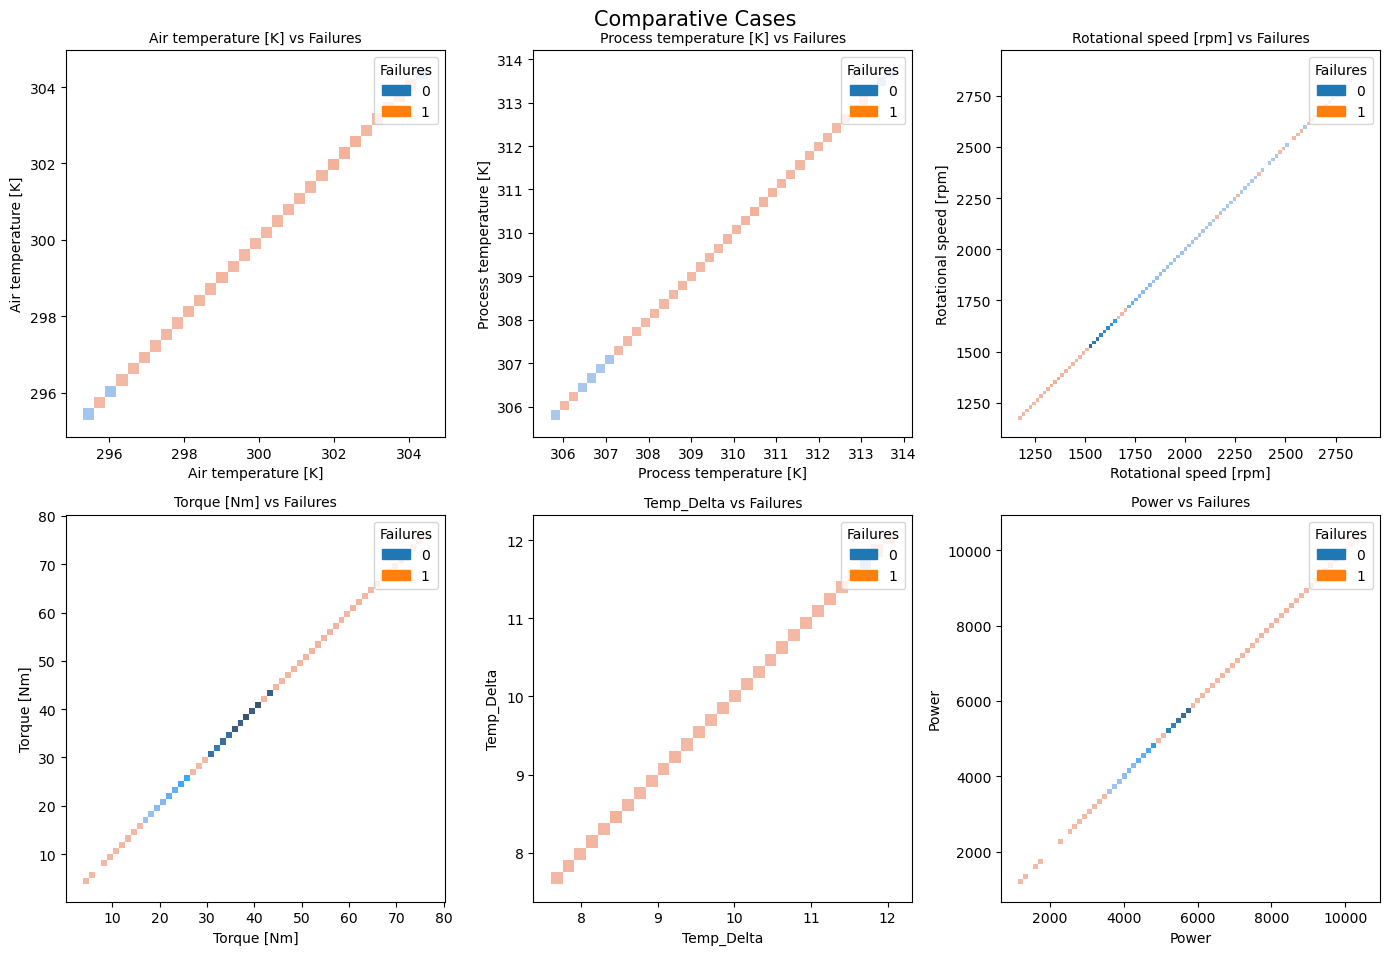

In [19]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(dist):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=df, x=col,hue='Failures', y=col, kde=True)
    plt.title(f'{col} vs Failures', fontsize=10)
plt.suptitle("Comparative Cases", fontsize=15)
plt.tight_layout()
plt.show()

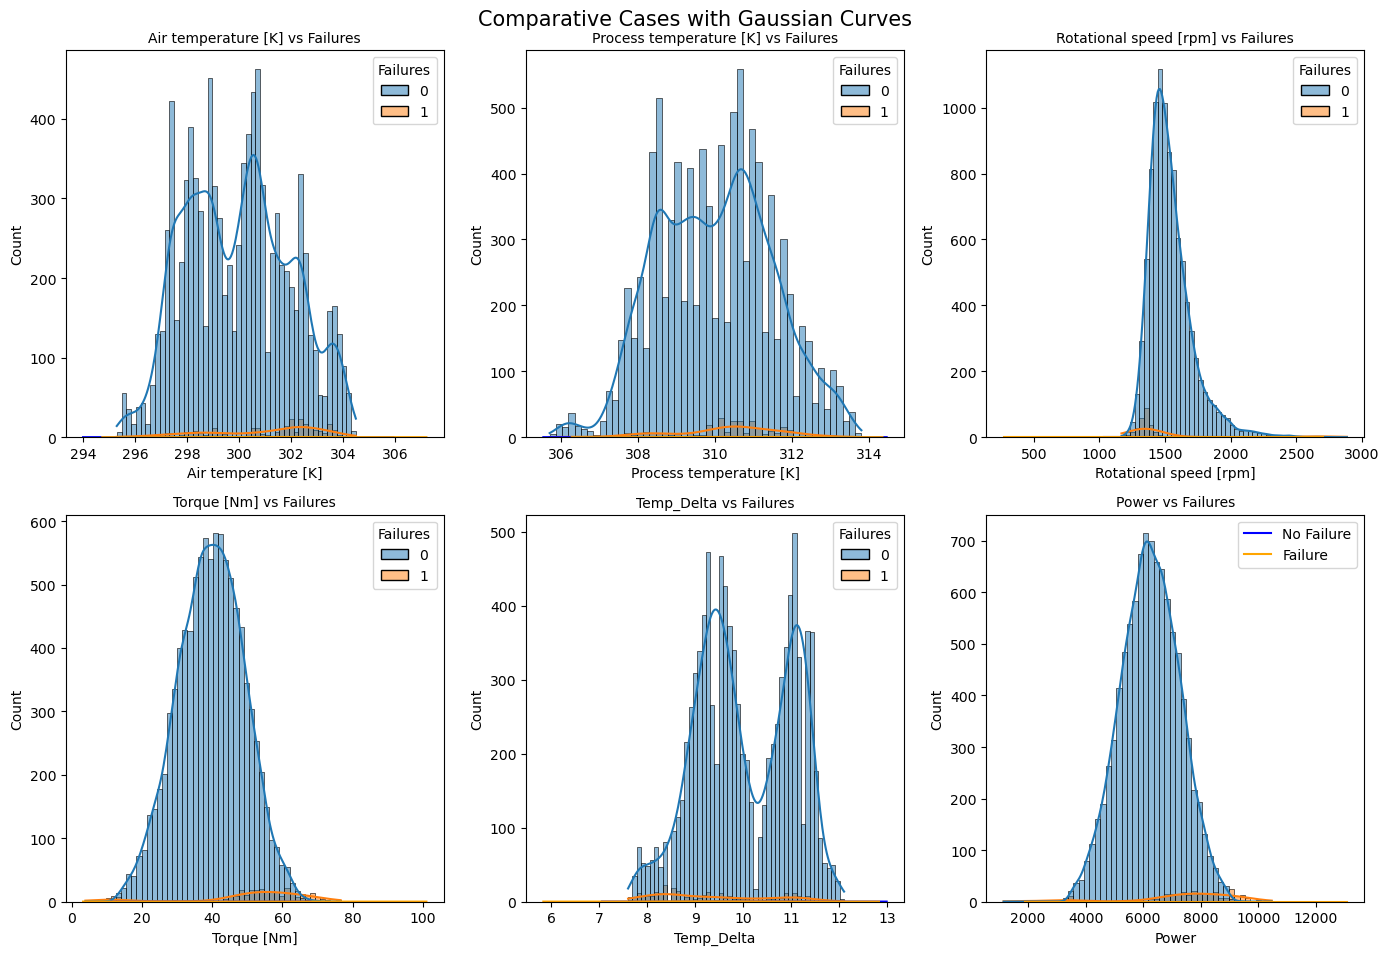

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

plt.figure(figsize=(14, 14))

# Specify the number of bins for the histograms
bins = 50

for i, col in enumerate(dist):
    plt.subplot(3, 3, i + 1)

    # Plot histograms with Gaussian curves
    sns.histplot(data=df, x=col, hue='Failures', kde=True, bins=bins, common_norm=False)

    # Get the mean and standard deviation for each class
    mean_no_failure = df[df['Failures'] == 0][col].mean()
    std_no_failure = df[df['Failures'] == 0][col].std()

    mean_failure = df[df['Failures'] == 1][col].mean()
    std_failure = df[df['Failures'] == 1][col].std()

    # Generate x values for the Gaussian curves
    x_no_failure = np.linspace(mean_no_failure - 3 * std_no_failure, mean_no_failure + 3 * std_no_failure, 100)
    x_failure = np.linspace(mean_failure - 3 * std_failure, mean_failure + 3 * std_failure, 100)

    # Plot Gaussian curves
    plt.plot(x_no_failure, norm.pdf(x_no_failure, mean_no_failure, std_no_failure), label='No Failure', color='blue')
    plt.plot(x_failure, norm.pdf(x_failure, mean_failure, std_failure), label='Failure', color='orange')

    plt.title(f'{col} vs Failures', fontsize=10)

plt.suptitle("Comparative Cases with Gaussian Curves", fontsize=15)
plt.tight_layout()
plt.legend()
plt.show()


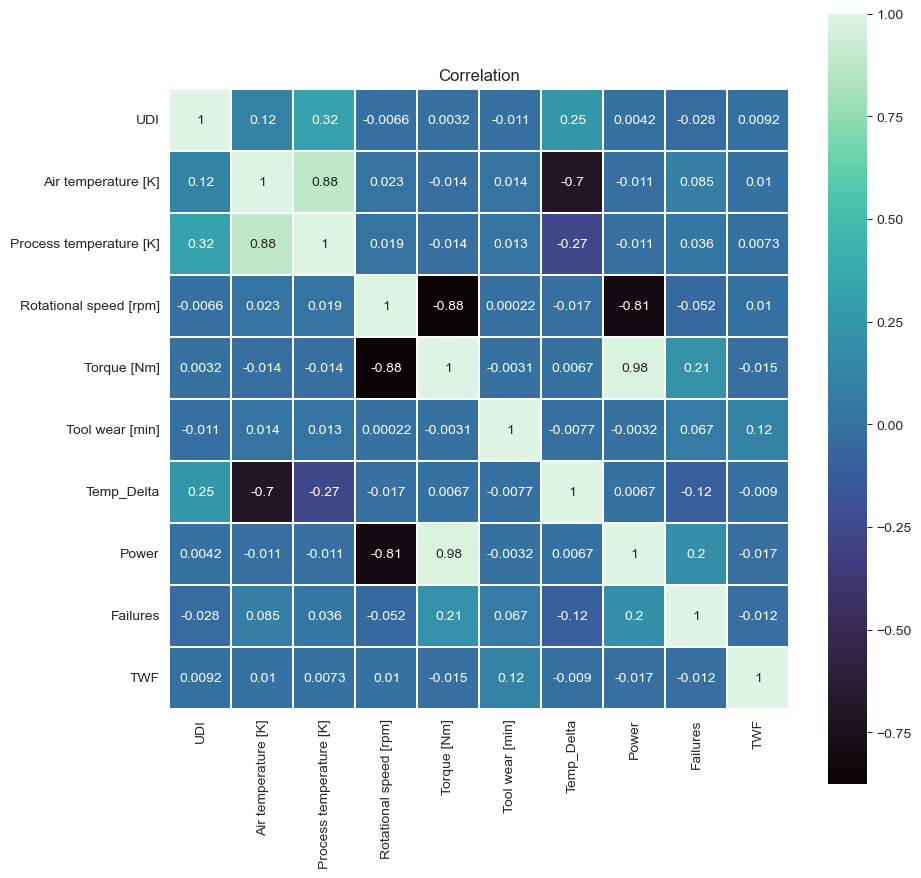

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(df[num_data+target1+target2].corr(), square = True, annot = True, cmap = 'mako', linewidths = 0.3)
plt.title("Correlation")
plt.show()

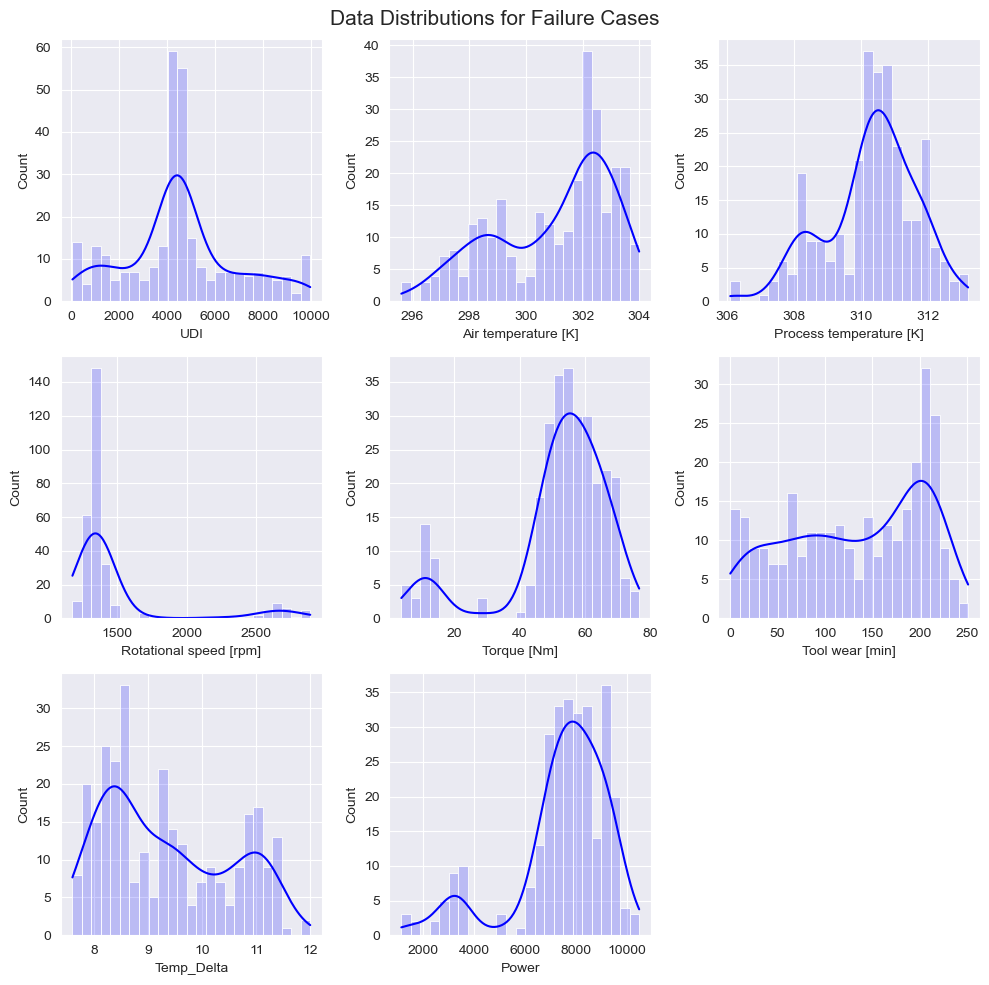

In [15]:
plt.figure(figsize = (10, 10))
for i, col in enumerate(num_data):
    plt.subplot(3,3, i+1)
    sns.histplot(df[df['Failures']==1], x = col, kde = True, alpha = 0.2, color = 'blue', bins = 25)
plt.suptitle("Data Distributions for Failure Cases", fontsize = 15)
plt.tight_layout()
plt.show()


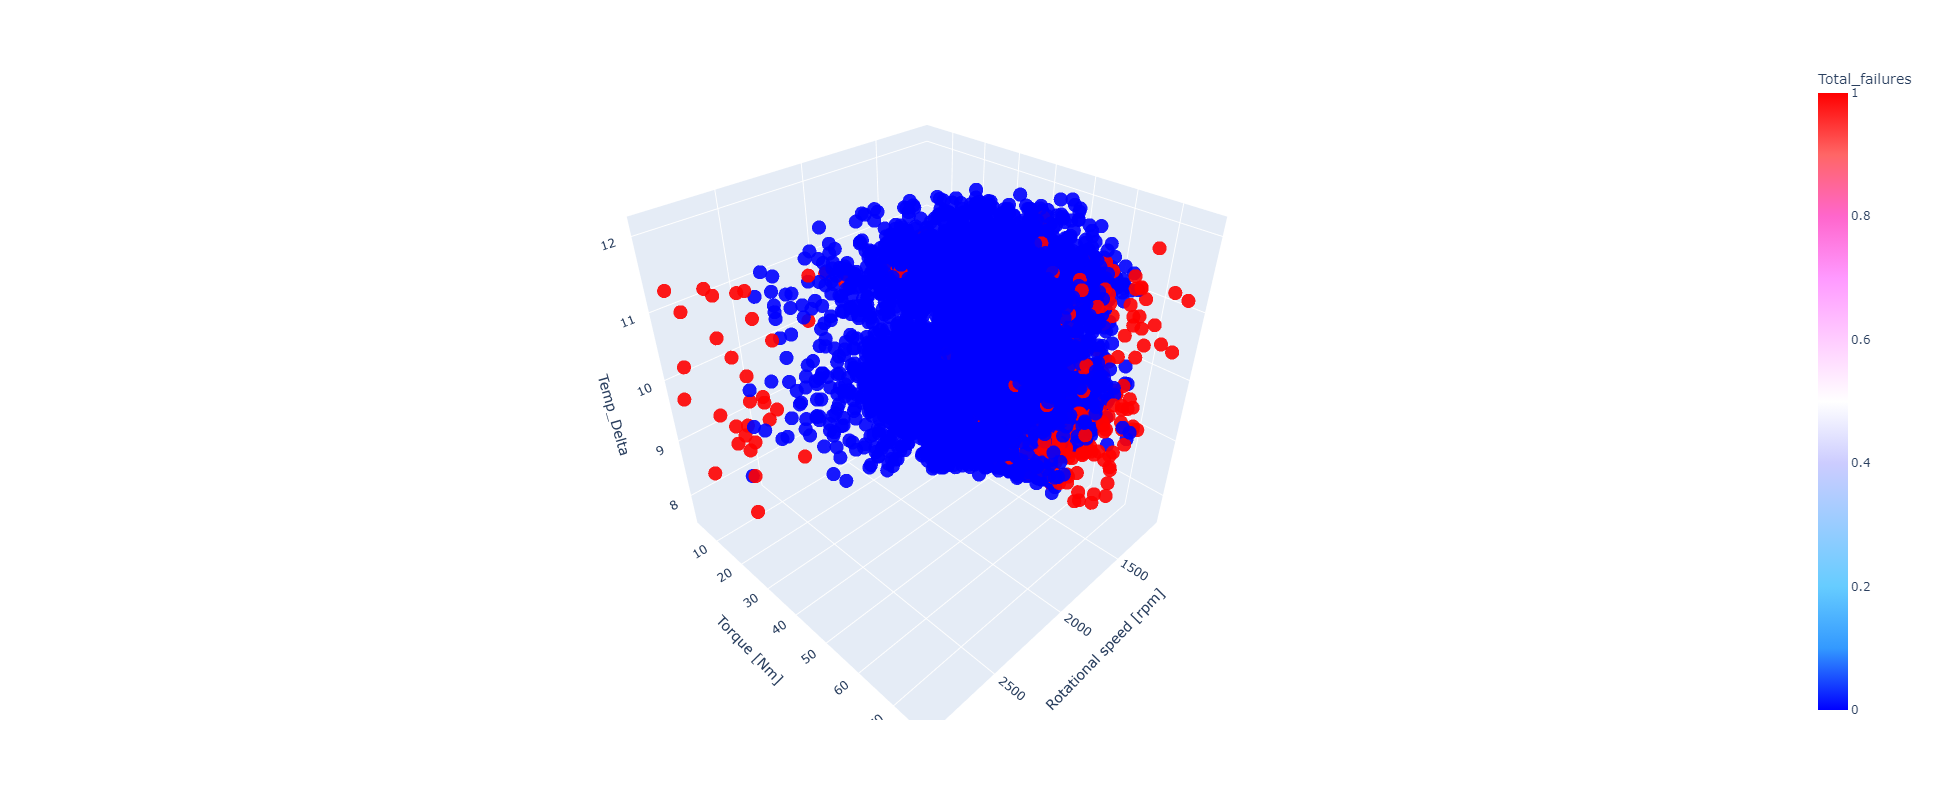

In [22]:
df['Total_failures'] = df['TWF']+df['Failures']

fig = px.scatter_3d(df,
                 x='Rotational speed [rpm]',
                 y= 'Torque [Nm]',
                 z= 'Temp_Delta',
                 color='Total_failures', 
                    opacity=0.9,
                    height=800, color_continuous_scale='Picnic'
                    )
fig.show()

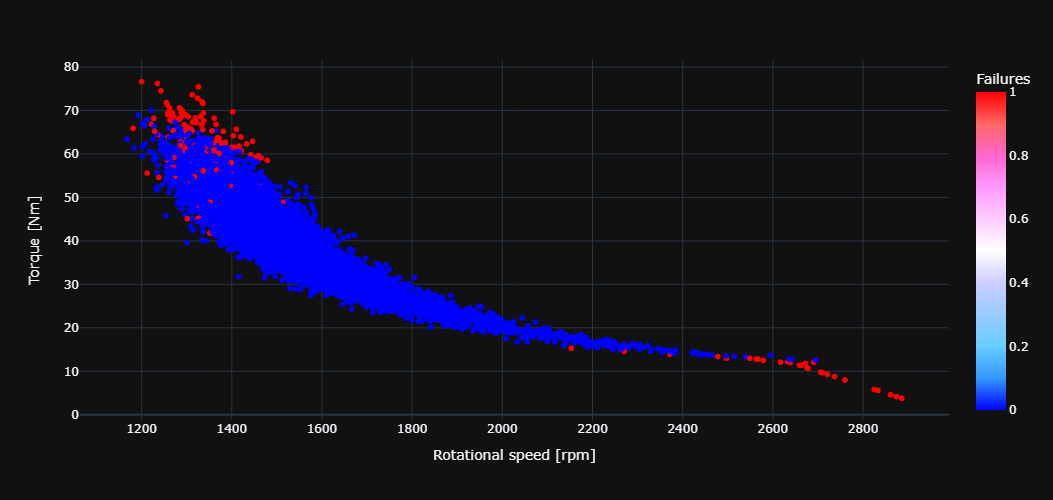

In [17]:
fig = px.scatter(df,
                 x='Rotational speed [rpm]',
                 y= 'Torque [Nm]',
                 color='Failures', 
                    opacity=1,
                    height=500, color_continuous_scale='Picnic'
                    )
fig.show()

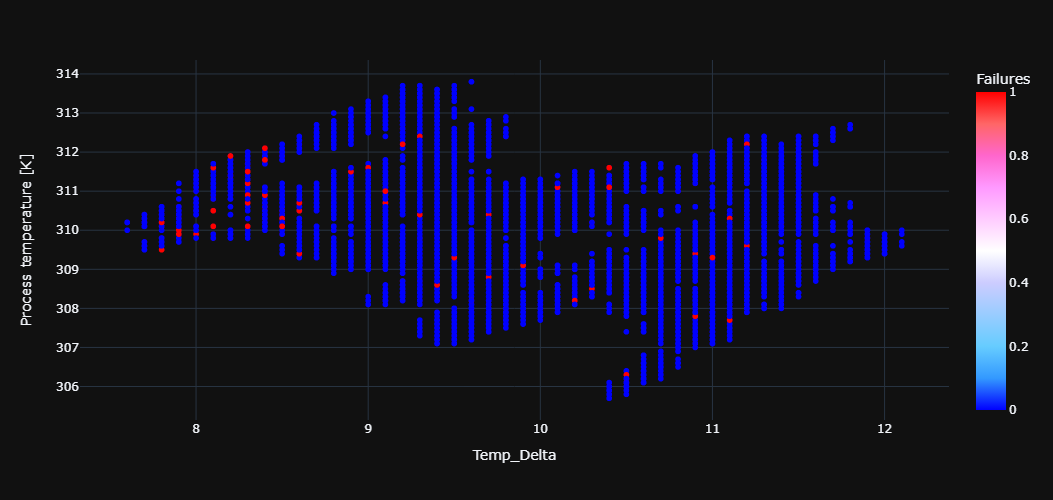

In [18]:
fig = px.scatter(df,
                 y='Process temperature [K]',
                 x= 'Temp_Delta',
                 color='Failures', 
                    opacity=1,
                    height=500, color_continuous_scale='Picnic'
                    )
fig.show()

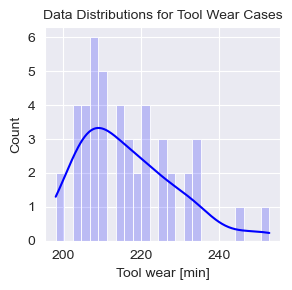

In [19]:
plt.figure(figsize = (3, 3))
sns.histplot(df[df['TWF']==1], x = 'Tool wear [min]', kde = True, alpha = 0.2, color = 'blue', bins = 25)
plt.title("Data Distributions for Tool Wear Cases", fontsize = 10)
plt.tight_layout()
plt.show()


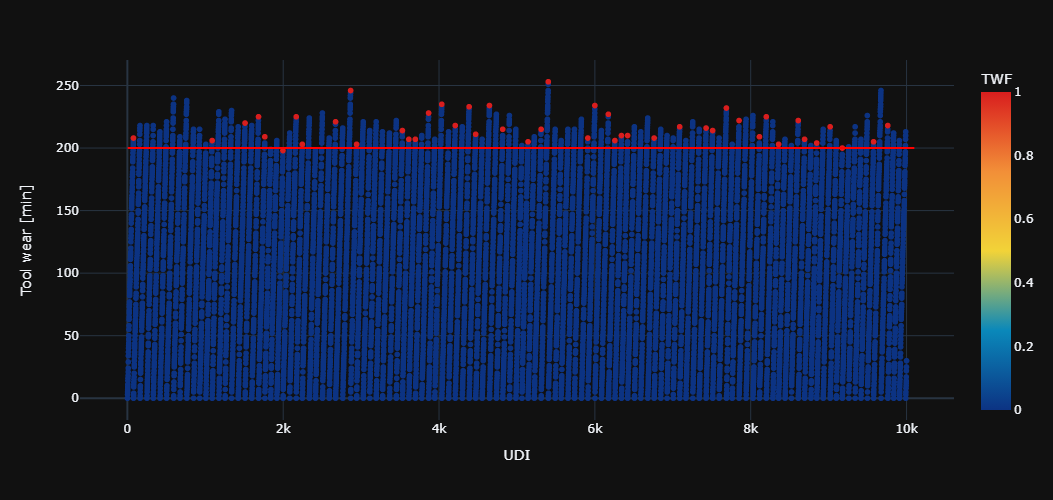

In [20]:
unit_sum = df.groupby('UDI')['Tool wear [min]'].sum()

fig = px.scatter(df,
                 x='UDI',
                 y= 'Tool wear [min]',
                 color='TWF', 
                    opacity=1,
                    height=500, color_continuous_scale='Portland'
                    )

fig.add_shape(type="line",x0=10100,y1=200,y0=200, line=dict(color="red", width=2))
fig.show()

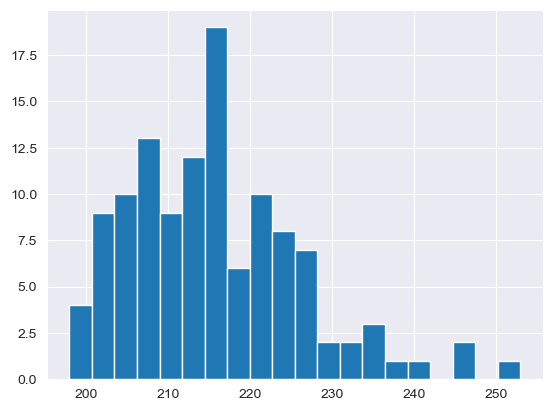

In [21]:
tool_stop = []
for i in range(1, len(df['Tool wear [min]'])):
    if df['Tool wear [min]'][i]==0:
        tool_stop.append(df['Tool wear [min]'][i-1])

twf_data = []
for i in range(1, len(df['Tool wear [min]'])):
    if [df[(df['TWF'] == 1)]['Tool wear [min]']]:
        twf_data.append(df['Tool wear [min]'][i])

plt.hist(tool_stop, bins=20)
plt.show()



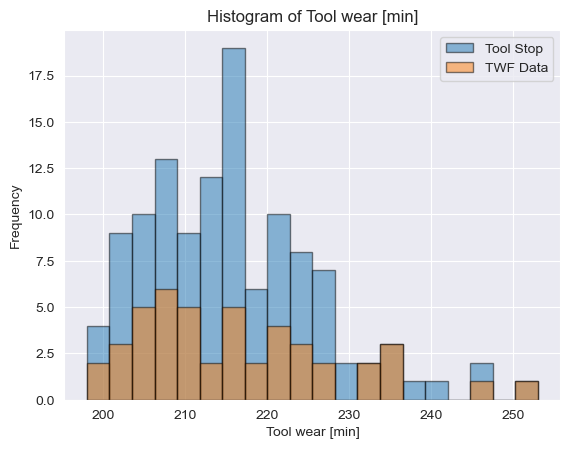

In [22]:
import matplotlib.pyplot as plt

# Your code to create tool_stop
tool_stop = []
for i in range(1, len(df['Tool wear [min]'])):
    if df['Tool wear [min]'][i] == 0:
        tool_stop.append(df['Tool wear [min]'][i - 1])

# Your code to create twf_data
twf_data = []
for i in range(1, len(df['Tool wear [min]'])):
    if df['TWF'][i] == 1:
        twf_data.append(df['Tool wear [min]'][i])

# Plotting histograms
plt.hist(tool_stop, bins=20, edgecolor='black', alpha=0.5, label='Tool Stop')
plt.hist(twf_data, bins=20, edgecolor='black', alpha=0.5, label='TWF Data')

# Adding labels and title
plt.xlabel('Tool wear [min]')
plt.ylabel('Frequency')
plt.title('Histogram of Tool wear [min]')
plt.legend()  # Display legend to distinguish between the two datasets
plt.show()


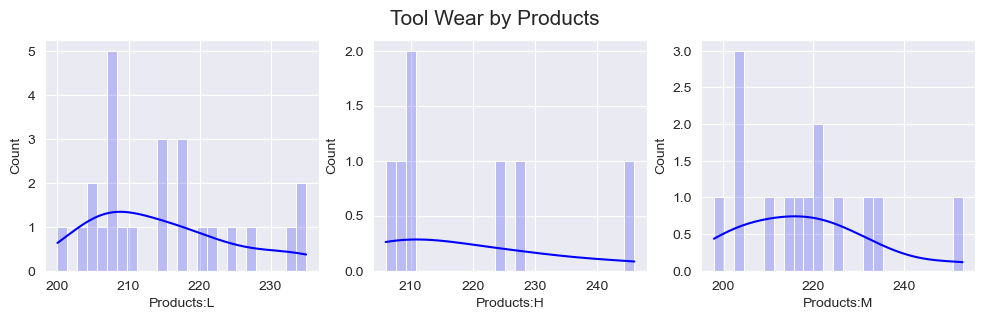

In [23]:
products = ['L', 'H', 'M']
plt.figure(figsize=(12, 3))

boxplot_data = [df[(df['Type'] == product) & (df['TWF'] == 1)]['Tool wear [min]'] for product in products]

for i, product in enumerate(products):
    plt.subplot(1, len(products), i + 1)
    sns.histplot(boxplot_data[i], kde = True, alpha = 0.2, color = 'blue', bins = 25)
    plt.suptitle("Tool Wear by Products", fontsize = 15)
    plt.xlabel(f'Products:{product}')


plt.show()

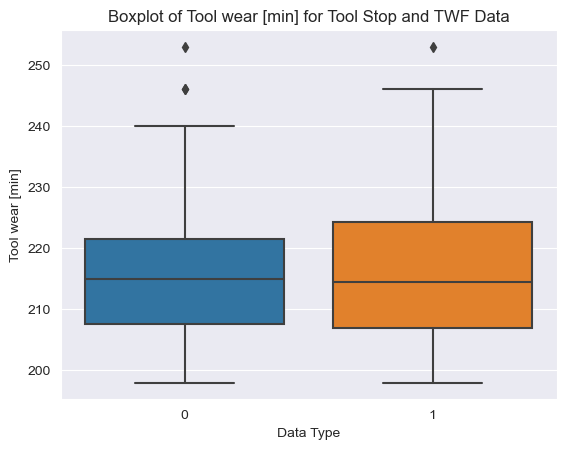

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your code to create tool_stop
tool_stop = []
for i in range(1, len(df['Tool wear [min]'])):
    if df['Tool wear [min]'][i] == 0:
        tool_stop.append(df['Tool wear [min]'][i - 1])

# Your code to create twf_data
twf_data = []
for i in range(1, len(df['Tool wear [min]'])):
    if df['TWF'][i] == 1:
        twf_data.append(df['Tool wear [min]'][i])

# Combine data into a single list
combined_data = [tool_stop, twf_data]

# Create a boxplot using Seaborn
sns.boxplot(data=combined_data)
plt.xlabel('Data Type')
plt.ylabel('Tool wear [min]')
plt.title('Boxplot of Tool wear [min] for Tool Stop and TWF Data')
plt.show()


In [13]:
Wear_Stop = []

for i in range(1,len(df['Tool wear [min]'])):
    if df["Planned_Stop"][i] == 1:
        Wear_Stop.append(df['Tool wear [min]'][i])

print(min(Wear_Stop))

198
